In [3]:
import os
import numpy as np
from validation_scripts.mlso_utils import *
from pathlib import Path
os.chdir("Recipes")
import glob

import glob
import numpy as np
import matplotlib.pylab as plt

In [135]:
print(os.getcwd())
def get_kitt_peak_atlas():
    atlas = np.zeros([0,3])
    for atlas_name in glob.glob("../resource/lm*"):
        atlas1 = np.loadtxt(atlas_name)
        atlas = np.concatenate((atlas,atlas1),axis=0)
    return atlas
atlas = get_kitt_peak_atlas()
atlas

c:\ucomp-configuration\Recipes


array([[5.28000610e+02, 9.49500000e-01, 1.98770000e+02],
       [5.28001280e+02, 9.40490000e-01, 1.96880000e+02],
       [5.28001950e+02, 9.29430000e-01, 1.94570000e+02],
       ...,
       [1.08809595e+03, 9.97420000e-01, 6.41000000e+01],
       [1.08809741e+03, 9.97720000e-01, 6.41200000e+01],
       [1.08809875e+03, 9.97860000e-01, 6.41200000e+01]])

In [151]:
key= 1074
temp = np.loadtxt(glob.glob(f"../resource/{key}*.csv")[0],delimiter=",",skiprows =10)
temp[:,0] = temp[:,0]+.5

1070 ../resource/1070*.csv ../resource\tuning_calibration_1070.ini
1074 ../resource/1074*.csv ../resource\tuning_calibration_1074.7.ini
1079 ../resource/1079*.csv ../resource\tuning_calibration_1079.8.ini
1083 ../resource/1083*.csv ../resource\tuning_calibration_1083.0.ini
530 ../resource/530*.csv ../resource\tuning_calibration_530.3.ini
637 ../resource/637*.csv ../resource\tuning_calibration_637.4.ini
656 ../resource/656*.csv ../resource\tuning_calibration_656.3.ini
670 ../resource/670*.csv ../resource\tuning_calibration_670.2.ini
691 ../resource/691*.csv ../resource\tuning_calibration_691.8.ini
706 ../resource/706*.csv ../resource\tuning_calibration_706.2.ini
761 ../resource/761*.csv ../resource\tuning_calibration_761.2.ini
789 ../resource/789*.csv ../resource\tuning_calibration_789.4.ini
802 ../resource/802*.csv ../resource\tuning_calibration_802.4.ini
991 ../resource/991*.csv ../resource\tuning_calibration_991.3.ini


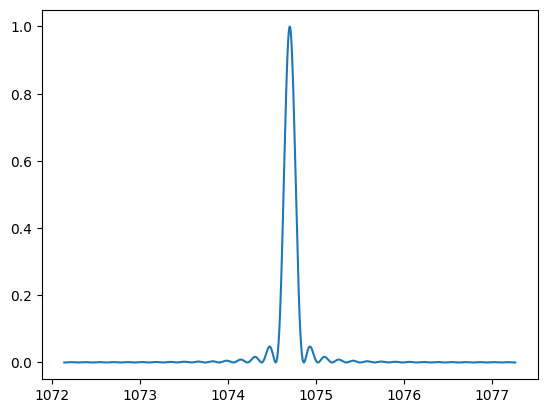

In [8]:
plt.plot(*createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7))

(1074.0, 1075.0)

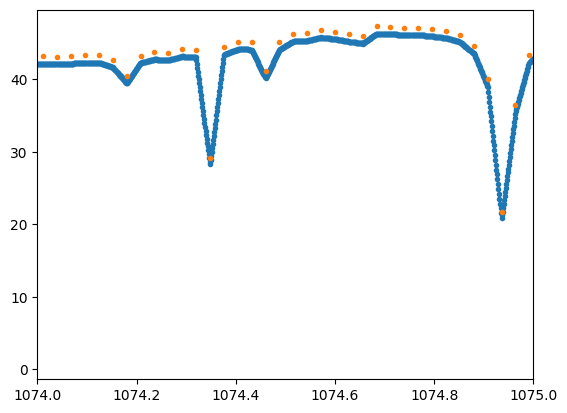

In [193]:
plt.plot(wave,np.interp(wave,tuning_configs["1074"]["prefilter"][:,0],tuning_configs["1074"]["prefilter"][:,1]),".")
plt.plot(tuning_configs["1074"]["prefilter"][:,0],tuning_configs["1074"]["prefilter"][:,1]+1,".")
plt.xlim(1074,1075)

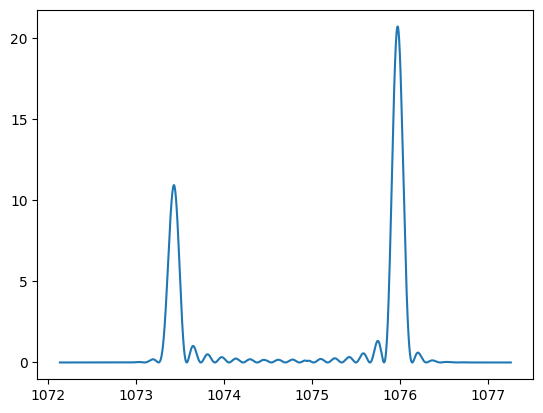

In [ ]:
plt.plot(np.sum(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband"))

Text(0.5, 0, 'Wavelength [nm]')

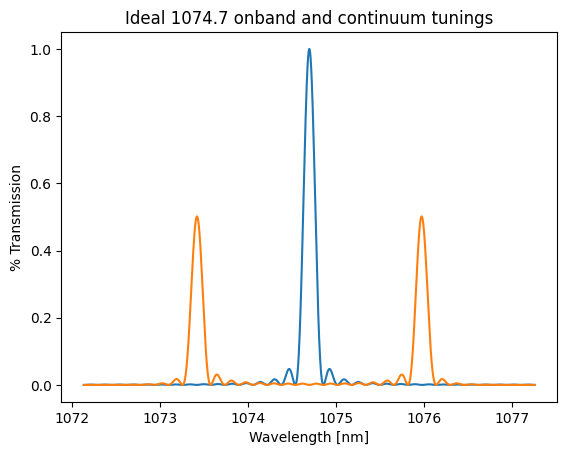

In [350]:
plt.plot(*createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7))
plt.plot(*createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7,cam="offband"))
#plt.xlim(1074.55,1074.85)
plt.title("Ideal 1074.7 onband and continuum tunings")
plt.ylabel("% Transmission")
plt.xlabel("Wavelength [nm]")


In [ ]:
wavelng = []
convolve_sum_on = []
tuning_waves,tuning_values = createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="onband")
profile_power = np.sum(tuning_values)
for waveoff in range(-80,80):
    tuning_waves,tuning_values = createStages(filterConfig=filterConfig1074,wavelength=1074.7+waveoff/20,cam="onband")
    convolved = []
    
    for i in range(len(tuning_waves)):
        prefilter_value = filter1074[find_nearest(filter1074[:,0],tuning_waves[i]),1]
        atlas_value =    atlas[find_nearest(atlas[:,0],tuning_waves[i]),1]
        convolved.append(tuning_values[i]*prefilter_value*atlas_value)
    wavelng.append(1074.7+waveoff/20)
    convolve_sum_on.append(np.sum(convolved)/profile_power)
plt.plot(wavelng,convolve_sum_on,label="Convolved onband")
plt.plot(wavelng,convolve_sum_off,label="Convolved onband")
plt.xlabel("Recipe commanded lyot tuning")
plt.title("Convolved, pre-filter and lyot filter tuning transmission profiles vs recipe tuning")

np.float64(156.25000000697685)

In [23]:
np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband")[1])/np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband")[1])

np.float64(1.4043619805963796)

In [20]:
np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband")[1])

np.float64(5105.187554863249)

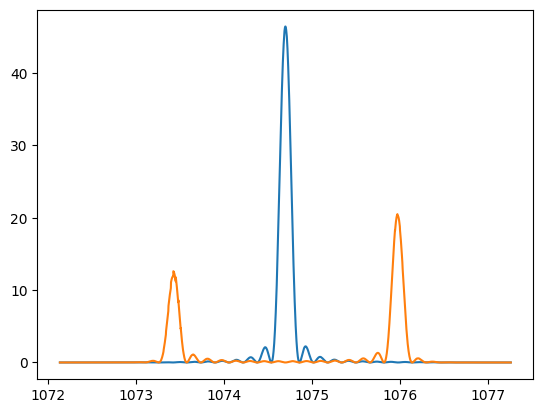

In [22]:
plt.plot(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband"))
plt.plot(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband"))

1.0
0.4547540195915311


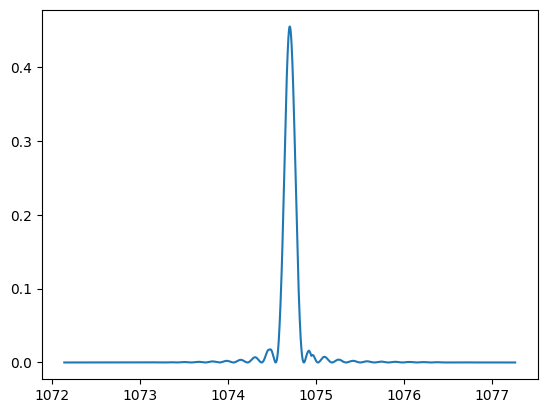

In [362]:
plt.plot(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband"))

In [363]:

def convolve_filters(wave,config,cam="onband",cont="both"):
    tuning_wave,tuning_trans = createStages(filterConfig=config,wavelength=wave,cam=cam,cont=cont)#,offsets=[0,0,0,0,-np.pi/4])# [0,np.pi/9,-np.pi/16,-np.pi/4,0])
    print(max(tuning_trans))
    tuning_trans = tuning_trans*np.interp(tuning_wave,config["prefilter"][:,0],config["prefilter"][:,1])/100
    print(max(tuning_trans))
    #for i in range(len(tuning_wave)):
        #tuning_trans[i] = tuning_trans[i]*config["prefilter"][find_nearest(config["prefilter"][:,0],tuning_wave[i]),1]
    return tuning_wave,tuning_trans

0.9999784974374972
0.01975279107826129
0.5014635434209223
0.20696730729943905
0.9999784974374972
0.01975279107826129
0.5014635434209223
0.20696730729943905
0.9999782513965615
0.019815108018008388
0.5014635273920555
0.20753582468713702
0.9999782513965615
0.019815108018008388
0.5014635273920555
0.20753582468713702
0.9999944229560448
0.019554118853803787
0.5014622830117149
0.20808540390078611
0.9999944229560448
0.019554118853803787
0.5014622830117149
0.20808540390078611
0.9999999964480357
0.018985971670380325
0.5014556987514356
0.20840388471551619
0.9999999964480357
0.018985971670380325
0.5014556987514356
0.20840388471551619
0.9999949717308265
0.018218839274716337
0.5014620731705796
0.2087055617514518
0.9999949717308265
0.018218839274716337
0.5014620731705796
0.2087055617514518
0.9999793489321736
0.019793096929705732
0.5014635940388507
0.20900499020473887
0.9999793489321736
0.019793096929705732
0.5014635940388507
0.20900499020473887
0.9999773777939167
0.02140202125349203
0.501463465635833

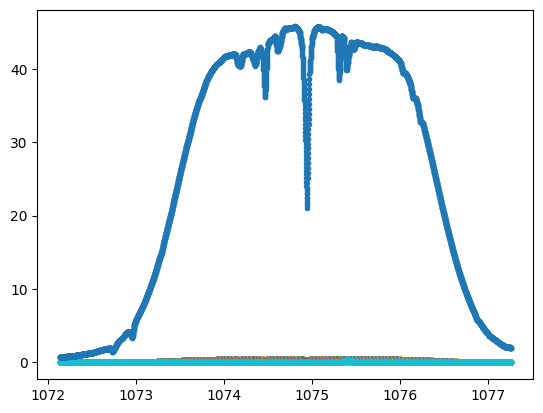

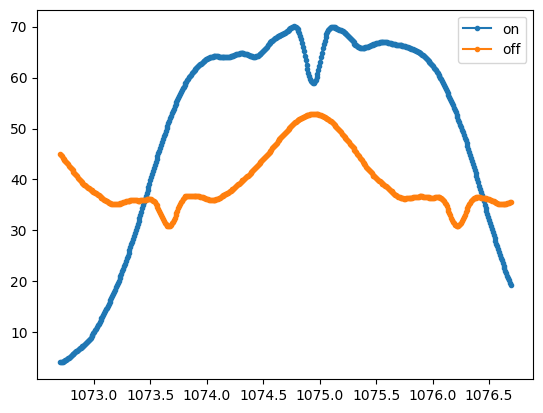

In [364]:
tuning_configs = {}
for tuning_config in glob.glob("../resource/*ini"):
    key = Path(tuning_config).name.split("_")[-1].split(".")[0]
    tuning_configs[key] =  getFilterConfig(tuning_config)
    if len(glob.glob(f"../resource/{key}*.csv")) == 1:
        #print(key,f"../resource/{key}*.csv",tuning_config)
        tuning_configs[key]["prefilter"] = np.loadtxt(glob.glob(f"../resource/{key}*.csv")[0],delimiter=",",skiprows =10)
        tuning_configs[key]["prefilter"][:,0] = tuning_configs[key]["prefilter"][:,0] +.05
        for tune_number in range(len(tuning_configs[key]["prefilter"][:,0])):
            atlas_value =    atlas[find_nearest(atlas[:,0],tuning_configs[key]["prefilter"][tune_number,0]),1]
            tuning_configs[key]["prefilter"][tune_number,1] = atlas_value*tuning_configs[key]["prefilter"][tune_number,1]
        #tuning_configs[key]["prefilter"] = np.array([tuning_configs[key]["prefilter"][:,0],tune_values])
        #print(tuning_configs[key]["prefilter"].shape)

wave_list_ucomp = sorted([1073.8,
 1073.9199999999998,
 1074.04,
 1074.1599999999999,
 1074.28,
 1074.3999999999999,
 1074.52,
 1074.6399999999999,
 1074.76,
 1074.82,
 1074.84,
 1074.84,
 1074.84,
 1074.8799999999999,
 1074.8899999999999,
 1074.8899999999999,
 1074.8899999999999,
 1074.9399999999998,
 1074.94,
 1074.94,
 1074.94,
 1075.0,
 1075.0,
 1075.0,
 1075.0,
 1075.06,
 1075.06,
 1075.06,
 1075.11,
 1075.11,
 1075.11,
 1075.12,
 1075.1599999999999,
 1075.1599999999999,
 1075.1599999999999,
 1075.24,
 1075.36,
 1075.48,
 1075.6,
 1075.72,
 1075.84,
 1075.96,
 1076.08,
 1076.2,
 1076.4,
 1076.6,
 1076.8,
 1077,
 1077.2,

 
 1075.5,1075.52,1075.54,1075.56,1075.58,1075.62,1075.64,1075.68,1075.46,1075.44])
on = []
off = []
wave_list_ucomp = []
wave_width = 4
steps = 500
for w in range(steps):
    wave_list_ucomp.append(w/steps*wave_width -wave_width/2+ 1074.7)
#print(wave_list_ucomp)
#wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
for wave in wave_list_ucomp:
    #wave = wave -.6
    on.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="onband")[1]))
    off.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="offband")[1]))
    
    plt.plot(*convolve_filters(wave,config=tuning_configs["1074"],cam="onband"),".")
    plt.plot(*convolve_filters(wave,config=tuning_configs["1074"],cam="offband"),".")
w,t = convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband")
plt.plot(w,np.interp(w,tuning_configs["1074"]['prefilter'][:,0],tuning_configs["1074"]['prefilter'][:,1]),".-")
#plt.xlim(1073.5,1076.5)
plt.figure()
plt.plot(wave_list_ucomp,np.array(on),".-",label="on")
plt.plot(wave_list_ucomp,np.array(off),".-",label="off")
#plt.xlim(1073.5,1076.5)
#plt.ylim(0,500)
plt.legend()

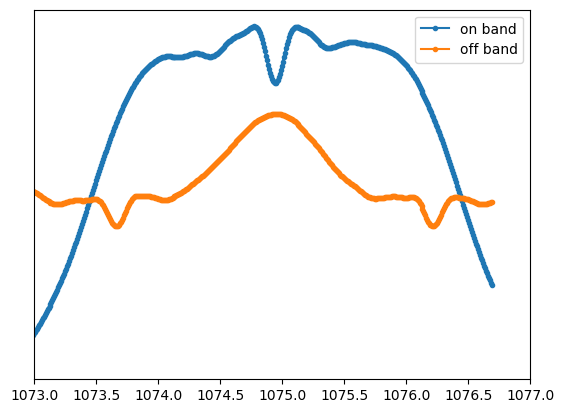

In [371]:
plt.plot(wave_list_ucomp,np.array(on),".-",label="on band")
plt.plot(wave_list_ucomp,np.array(off),".-",label="off band")
plt.xlim(1073,1077)
plt.gca().yaxis.set_visible(False)
plt.legend()
#plt.ylim(0,500)

2.099999999999909

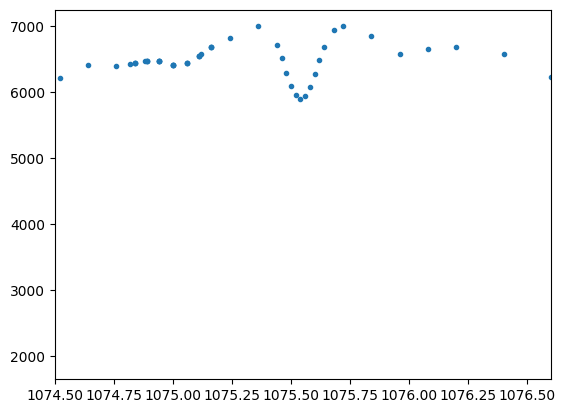

In [271]:
plt.plot(wave_list_ucomp,np.array(on),".",label="on")
#plt.plot(wave_list_ucomp,np.array(off),".",label="off")
plt.xlim(1074.5,1076.6)
1076.6-1074.5

In [ ]:
#1074.29 offband 1075.55  all models   1.259999999999991,
##offband dip 1074.4  Onband dip 1075.6 all data   1.199999999999818)

In [249]:
1075.55-1074.29,1075.6-1074.4

(1.259999999999991, 1.199999999999818)

In [113]:
np.polyfit(wave_list_ucomp,on,1),np.polyfit(wave_list_ucomp,off,1)

(array([ 9.10860614e+02, -9.71761045e+05]),
 array([ 2.11565092e+03, -2.26863164e+06]))

In [101]:
ratio = []
#wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
for wave in wave_list_ucomp:
    ratio.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="onband")[1])/np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="offband")[1]))

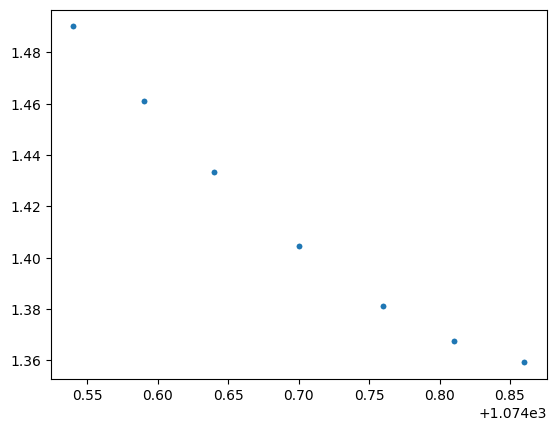

In [102]:
plt.plot(np.array(wave_list_ucomp),np.array(ratio),".",label="ucomp")
#plt.plot(wavelist,compratio,".",label="comp")
#plt.legend()

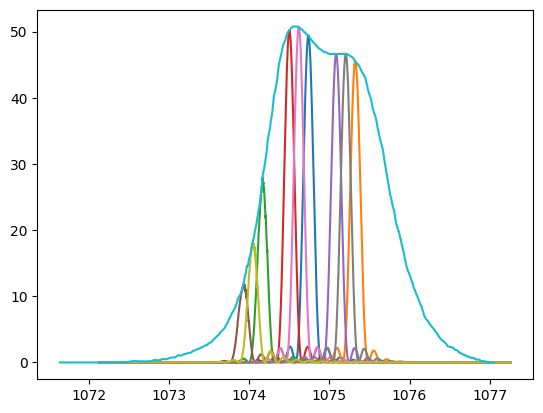

In [54]:
plt.plot(*convolve_filters(1074.74,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.74+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.74-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(*convolve_filters(1074.5,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.5+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.5-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(*convolve_filters(1074.62,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.62+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.62-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(tuning_configs["1070"]['prefilter'][:,0],tuning_configs["1070"]['prefilter'][:,1])

In [123]:
compratio = []
comp_off = []
comp_on = []
#wavelist = sorted([1074.5,1074.62,1074.74])
for wave in wave_list_ucomp:
    comp_on.append(np.sum(convolve_filters(wave,config=tuning_configs["1070"],cam="onband")[1]))
    off1 = np.sum(convolve_filters(wave-.585,config=tuning_configs["1070"],cam="onband")[1])
    off2 = np.sum(convolve_filters(wave+.585,config=tuning_configs["1070"],cam="onband")[1])
    #compratio.append(on/(off1/2+off2/2))
    comp_off.append(off1/2+off2/2)

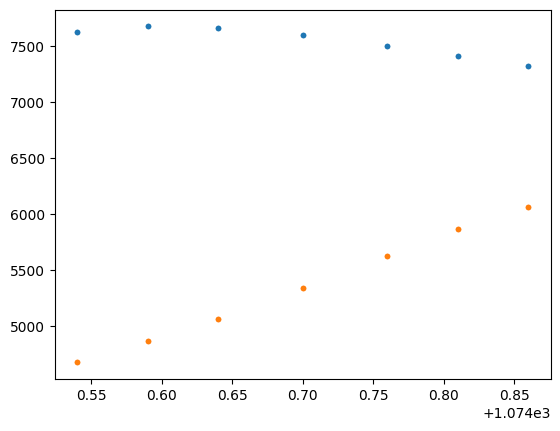

In [127]:

plt.plot(wave_list_ucomp,comp_on,".")
plt.plot(wave_list_ucomp,comp_off,".")

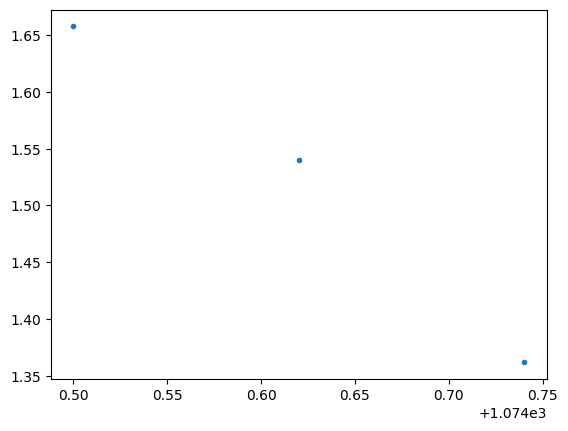

In [96]:
plt.plot(wavelist,compratio,".")

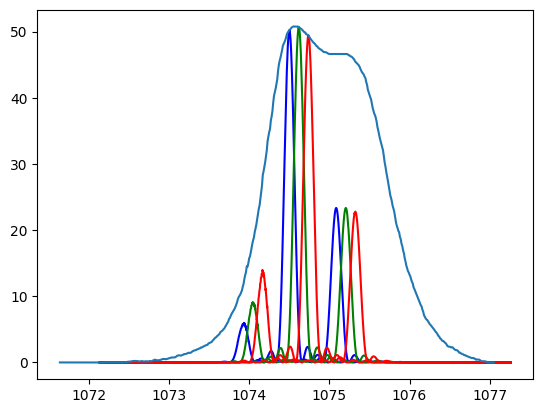

In [97]:
colors = ["b","g","r","y","c","m","k"]
for i, wave in enumerate(wavelist):
    plt.plot(*convolve_filters(wave,config=tuning_configs["1070"],cam="onband"),color=colors[i])
    
    tuning_waves,tuning_trans=convolve_filters(wave + .585,config=tuning_configs["1070"],cam="onband")
    #plt.plot(tuning_waves,tuning_trans/2)
    tuning_waves2,tuning_trans2=convolve_filters(wave - .585,config=tuning_configs["1070"],cam="onband")
    plt.plot(tuning_waves,(tuning_trans+tuning_trans2)/2,color=colors[i])


plt.plot(tuning_configs["1070"]['prefilter'][:,0],tuning_configs["1070"]['prefilter'][:,1])

In [84]:
wavelist

[1074.03, 1074.38, 1074.5, 1074.62, 1074.74, 1074.86, 1075.21]

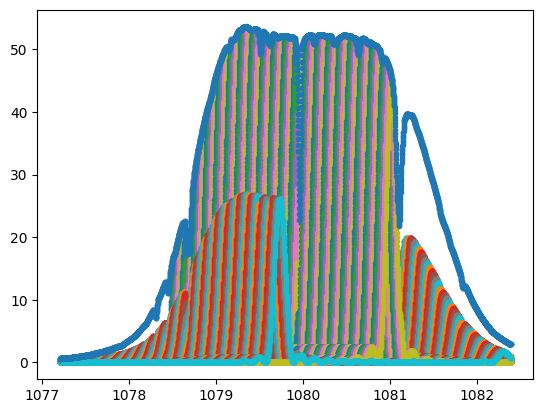

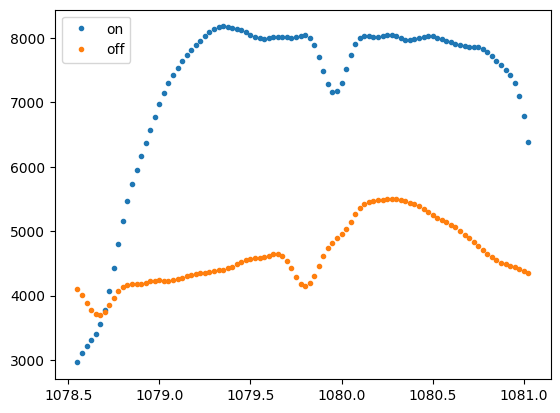

In [325]:
on = []
off = []
wave_list_ucomp = []
wave_width = 2.5
steps = 100
for w in range(steps):
    wave_list_ucomp.append(w/steps*wave_width -wave_width/2+ 1079.8)
#print(wave_list_ucomp)
#    wave =
#wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
for wave in wave_list_ucomp:
    #wave = wave -.6
    on.append(np.sum(convolve_filters(wave,config=tuning_configs["1079"],cam="onband")[1]))
    off.append(np.sum(convolve_filters(wave,config=tuning_configs["1079"],cam="offband")[1]))
    
    plt.plot(*convolve_filters(wave,config=tuning_configs["1079"],cam="onband"),".")
    plt.plot(*convolve_filters(wave,config=tuning_configs["1079"],cam="offband"),".")
w,t = convolve_filters(1074.7,config=tuning_configs["1079"],cam="onband")
plt.plot(w,np.interp(w,tuning_configs["1079"]['prefilter'][:,0],tuning_configs["1079"]['prefilter'][:,1]),".")
#plt.xlim(1073.5,1076.5)
plt.figure()
plt.plot(wave_list_ucomp,np.array(on),".",label="on")
plt.plot(wave_list_ucomp,np.array(off),".",label="off")
#plt.xlim(1073.5,1076.5)
#plt.ylim(0,500)
plt.legend()

In [341]:
tune_region = "706"
center = 1074.7
def plot_prefitler(tune_region="1074",center=1074.7,wave_width=2.5):
    on = []
    off = []
    wave_list_ucomp = []
    #wave_width = 2.5
    steps = 100
    for w in range(steps):
        wave_list_ucomp.append(w/steps*wave_width -wave_width/2+ center)
    #print(wave_list_ucomp)
    #    wave =
    #wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
    for wave in wave_list_ucomp:
        #wave = wave -.6
        on.append(np.sum(convolve_filters(wave,config=tuning_configs[tune_region],cam="onband")[1]))
        off.append(np.sum(convolve_filters(wave,config=tuning_configs[tune_region],cam="offband")[1]))
        
       # plt.plot(*convolve_filters(wave,config=tuning_configs[tune_region],cam="onband"),".")
       # plt.plot(*convolve_filters(wave,config=tuning_configs[tune_region],cam="offband"),".")
    #w,t = convolve_filters(1074.7,config=tuning_configs[tune_region],cam="onband")
    #plt.plot(w,np.interp(w,tuning_configs[tune_region]['prefilter'][:,0],tuning_configs[tune_region]['prefilter'][:,1]),".")
    #plt.xlim(1073.5,1076.5)
    plt.figure()
    plt.plot(wave_list_ucomp,np.array(on),".",label="on")
    plt.plot(wave_list_ucomp,np.array(off),".",label="off")
    plt.title(tune_region)
    #plt.xlim(1073.5,1076.5)
    #plt.ylim(0,500)
    plt.legend()

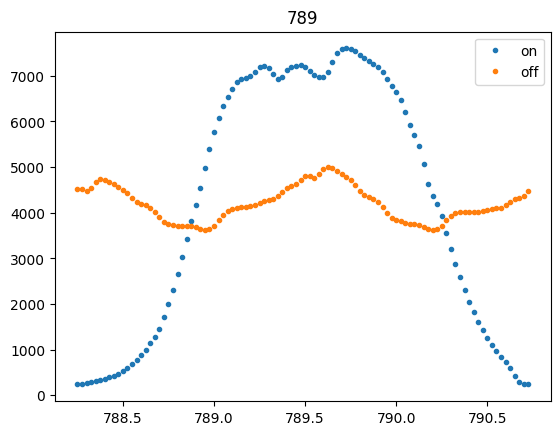

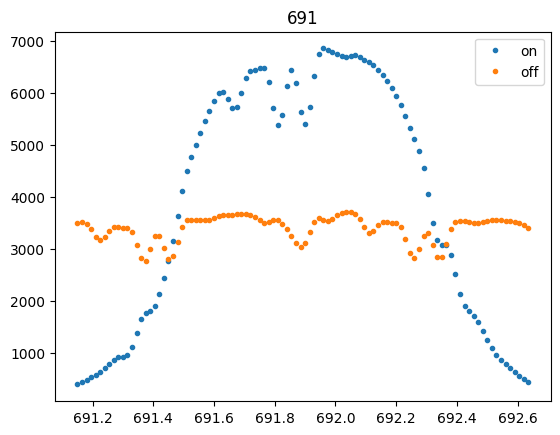

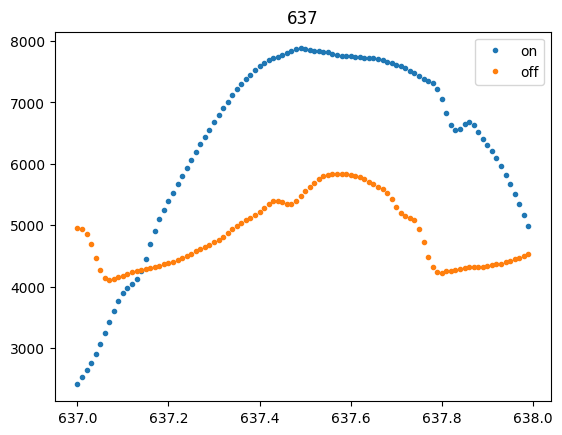

In [347]:
plot_prefitler(tune_region="789",center=789.5)
plot_prefitler(tune_region="691",center=691.9,wave_width=1.5)
plot_prefitler(tune_region="637",center=637.5,wave_width=1.)